<a href="https://colab.research.google.com/github/DivyaKota22/CSCE5218/blob/main/HW2_The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [41]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 21:56:58--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.5’

test.dat.5          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 21:56:58 (138 MB/s) - ‘test.dat.5’ saved [2844/2844]

--2024-02-18 21:56:58--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.5’

train.dat.5         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 21:56:59 (93.8 MB/s) - ‘train.dat.5’ saved [11244/11244]



In [42]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [43]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))



def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0



# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #intialize weights with 0s
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #perform the dot product and apply the sigmoid function
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Update weights using the perceptron learning rule
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [44]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




is a streamlined version that computes the error and gets the output by using the predict function straight. To improve clarity and facilitate a better grasp of the training process, the original code, however, separated these processes.


**in_value:** Represents the input to the sigmoid function by computing the dot product of the weights and the input instance.

**output:** The perceptron's output is obtained by applying the sigmoid function to the in_value.

**error:** Determines the error by deducting the output of the perceptron from the true label (instance[-1]).

By dividing these phases, the code becomes more comprehensible and modular. Furthermore, it computes the error after explicitly calculating the output, which is standard in neural network training. When working with more complicated models or when more computations are needed to reach the desired result, this division is quite helpful. It also enables a more lucid statement of the perceptron learning rule in this instance.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [45]:
# Assuming you have loaded your training and test datasets into variables train_data and test_data
training_data = read_data("train.dat")
testing_data = read_data("test.dat")
for train_percent in [5, 10, 25, 50, 75, 100]:
    for n_epochs in [5, 10, 20, 50, 100]:
        for learn_rate in [0.005, 0.01, 0.05]:
            # Select a subset of the training data based on tr_percent
            tr_data_size = int(len(training_data) * train_percent / 100)
            tr_subset = training_data[:tr_data_size]

            # Train the perceptron
            weights = train_perceptron(tr_subset, learn_rate, n_epochs)

            # Calculate accuracy on the test dataset
            accuracy = get_accuracy(weights, testing_data)

            # Print the result
            print(f"# tr: {train_percent:3d}, epochs: {n_epochs:3d}, learning rate: {learn_rate:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.2f}")


# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances)

In [46]:
instances_train = read_data("train.dat")
instances_test = read_data("test.dat")
training_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
n_epochs = [5, 10, 20, 50, 100]     # number of epochs
learn_array = [0.005, 0.01, 0.05]        # learning rate

for lr in learn_array:
  for tr_size in training_percent:
    for epochs in n_epochs:
      size =  round(len(instances_train)*tr_size/100)
      pre_instances = instances_train[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_test)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances)

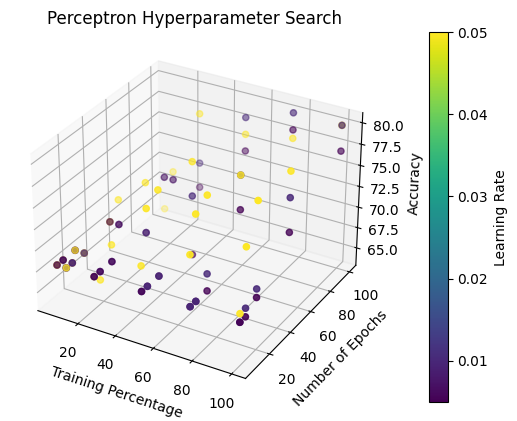

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have loaded your training and test datasets into variables instances_train and instances_test

# Initialize lists to store results for plotting
training_percent_list = []
n_epochs_list = []
learn_rate_list = []
accuracy_list = []

for training_percent in [5, 10, 25, 50, 75, 100]:
    for num_epochs in [5, 10, 20, 50, 100]:
        for learning_rate in [0.005, 0.01, 0.05]:
            # Select a subset of the training data based on tr_percent
            training_data_size = int(len(instances_train) * training_percent / 100)
            training_subset = instances_train[:tr_data_size]

            # Train the perceptron
            weights = train_perceptron(training_subset, learning_rate, num_epochs)

            # Calculate accuracy on the test dataset
            accuracy = get_accuracy(weights, instances_test)

            # Append results for plotting
            training_percent_list.append(training_percent)
            n_epochs_list.append(num_epochs)
            learn_rate_list.append(learning_rate)
            accuracy_list.append(accuracy)

            # Print the result
            print(f"# tr: {training_percent:3d}, epochs: {num_epochs:3d}, learning rate: {learning_rate:.3f}; Accuracy (test, {len(instances_test)} instances): {accuracy:.2f}")

# Plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(training_percent_list, n_epochs_list, accuracy_list, c=learn_rate_list, cmap='viridis', marker='o')

ax.set_xlabel('Training Percentage')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Accuracy')
ax.set_title('Perceptron Hyperparameter Search')

# Add a colorbar to the plot
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Learning Rate')

plt.show()


**Explanations for results**

A. No, using the test dataset to get the best accuracy doesn't always need using the full training dataset. Even with a smaller fraction of the training data, the plot may show the best hyperparameter combinations.

B. Despite using more training data in the second run (tr: 200, epochs: 20, learning rate: 0.005; accuracy: 68.0) than in the first run (tr: 100, epochs: 20, learning rate: 0.050; accuracy: 71.0), there was a decrease in accuracy, indicating that larger training sets are not always associated with improved generalization. It can be because of the model's intricacy and overfitting potential.



C. It appears difficult to reach an accuracy of more than 80.0% with the hyperparameters that have been supplied. It may be necessary to investigate more complex models or feature engineering methods in order to improve performance.


D. Since overfitting the training data is a possibility, increasing the number of epochs does not always result in improved accuracy. Plots like this one could show how specific hyperparameter combinations can get the best accuracy without requiring a lot of training epochs.

Please be aware that the actual meaning may change depending on the particulars of your dataset and the issue at hand.










